### Getting Started with Notebooks on Blueshift

We first start by importing a few required functions from the `blueshift.research` module. The methods `list_datasets` and `use_dataset` allow us to list available datasets and select one, respectively as shown below:

In [2]:
from blueshift.research import list_datasets, use_dataset
print(list_datasets())

['nse']


We also import the `symbol`, `current` and `history` functions from the `blueshift.research` module. These form the primary interface to query the selected dataset. Note, **we must call `use_dataset` before** we can use any of these three functions.

In [3]:
from blueshift.research import symbol, current, history
# This is going to take some time!!!
use_dataset('nse')

Once a dataset is selected, we can use the `symbol` function to fetch an asset from the dataset selected using a string ticker (as we do while writing strategy code). Also, similar to strategy code, we can use the `current` and `history` method to fetch data. The signatures of these functions are as show below:

- symbol(sym, dt=None, *args, **kwargs): Returns the asset corresponding to the ticker `sym`. Specify `dt` (a pandas Timestamp) to fix the asset  resolution time. See [symbol](https://blueshift.quantinsti.com/api-docs/api.html#blueshift.core.algorithm.algorithm.TradingAlgorithm.symbol) for more details. Returns an [asset]() object
- current(assets, columns='close', dt=None, last_known=True): Returns the current value of the asset(s) for the chosen column(s). Specifiy `dt` (a pandas Timestamp) to select the query time (defaults to current timestamp). Set `last_known` to False to return a NaN value in case no data avaiable that matches the exact time specified. The return type depends on the input values. See [current](https://blueshift.quantinsti.com/api-docs/context.html#blueshift.data.readers.data_portal.DataPortal.current) for more details
- history(assets, columns, nbars, frequency, dt=None, adjusted=True): Returns the historical data for the asset(s) and column(s). The meaning of `dt` is same as in `current` above. Set `adjusted` to `False` if no adjustments is to be applied. The return type depends on the input values. See [history](https://blueshift.quantinsti.com/api-docs/context.html#querying-historical-data) for more details

Since we have already selected the dataset in the above, we can now use these functions to fetch data and make some plots!

<Axes: >

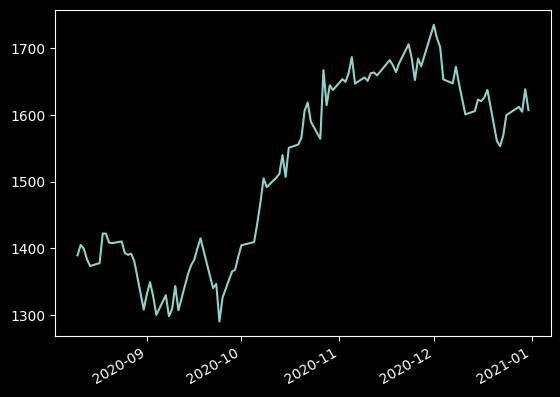

In [4]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')

asset = symbol('ACC')
px = history(asset, ['close'], 100, '1d', dt='2023-06-30')
px.close.plot()

Let's create a slightly better looking plot, using the plotly library

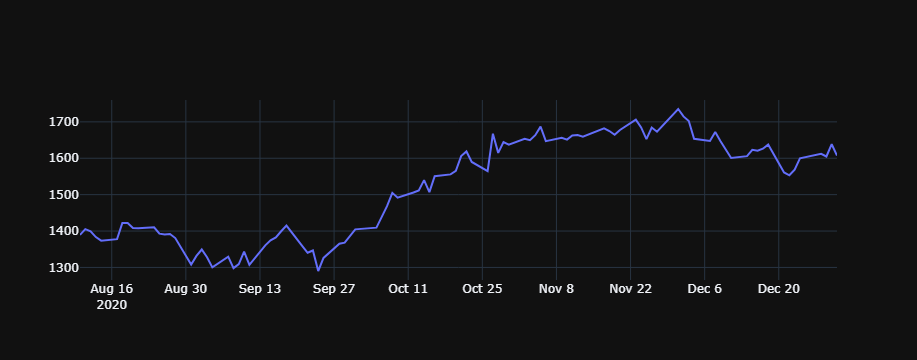

In [5]:
import plotly.graph_objects as go

fig = go.Figure([go.Scatter(x=px.index, y=px.close)])
fig.update_layout(template='plotly_dark')
fig.show()

Now that you know how to fetch assets and data, you are ready to explore your ideas. For a list of available packages, see [whitelist](https://blueshift.quantinsti.com/api-docs/howtos.html#what-is-the-python-support-on-blueshift). 